<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Guy Reuveni, 206398596
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 4/7/2024 at 23:59

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [556]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [557]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

C:\Users\guyha\AppData\Local\Temp\ipykernel_35660\3678166763.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


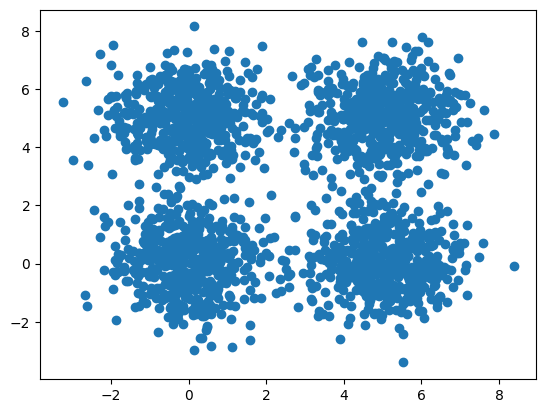

In [558]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [559]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None  # Here you should store the dataset X.
        # This can be useful for the next tasks.

        self.labels_ = None  # Here you should store the final labels.
        # That is, the clusters indices for all the samples

        self.centroids = None  # Here you should store the final centroids.

        self.labels_history = []  # Here you should store the labels of each iteration.
        # This can also be useful later.

        self.centroids_history = []  # Here you should store the centroids of each iteration.
        # This can also be useful later.

        self.costs = []  # Here you should store the costs of the iterations.
        # That is, you should calculate the cost in every iteration
        # and store it in this list.

    def fit(self, X):
        self.X_fit_ = X
        initial_centroid_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[initial_centroid_indices]

        for _ in range(self.max_iter):
            self.labels_ = self._get_labels(X)
            self.labels_history.append(self.labels_.copy())

            new_centroids = self._get_centroids(X, self.labels_)
            self.centroids_history.append(new_centroids.copy())

            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

            cost = self._calculate_cost(X)
            self.costs.append(cost)

    def predict(self, X):
        return self._get_labels(X)

    def _get_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances

    def _get_labels(self, X):
        distances = self._get_distances(X)
        return np.argmin(distances, axis=1)

    def _get_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                centroids[i] = points_in_cluster.mean(axis=0)
        return centroids

    def _calculate_cost(self, X):
        distances = self._get_distances(X)
        min_distances = np.min(distances, axis=1)
        return np.sum(min_distances ** 2)


Run the algorithm on the 2D dataset

In [560]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

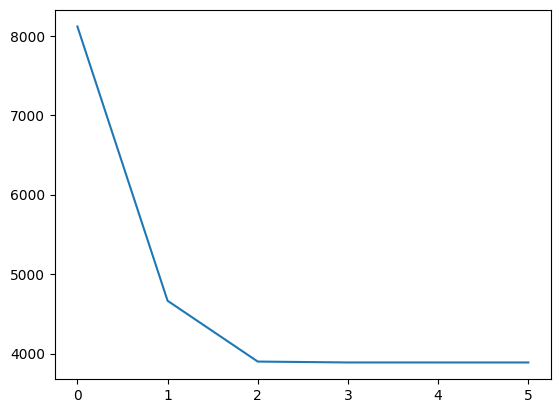

In [561]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 16600.39691342644<br>
3 clusters: 9976.192857820646<br>
4 clusters: 3886.9966821216385<br>
6 clusters: 3188.7140780714017<br>
8 clusters: 2625.5131015984134<br>
10 clusters: 2322.8152774380073<br>
20 clusters: 1138.1927284179358<br>

In [562]:
def run_kmeans(X, n_clusters):
    if n_clusters > X.shape[0]:
        return None
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300)
    kmeans.fit(X)
    return kmeans.costs[-1] if kmeans.costs else None


costs = {}
for n_clusters in [2, 3, 4, 6, 8, 10, 20]:
    costs[n_clusters] = run_kmeans(X, n_clusters)

for n_clusters, cost in costs.items():
    print(f"{n_clusters} clusters: {cost}")

2 clusters: 16600.39691342644
3 clusters: 9976.192857820646
4 clusters: 3886.9966821216385
6 clusters: 3188.7140780714017
8 clusters: 2625.5131015984134
10 clusters: 2322.8152774380073
20 clusters: 1138.1927284179358


Now write a code that plots the clusters and the locations of the centroids at each iteration

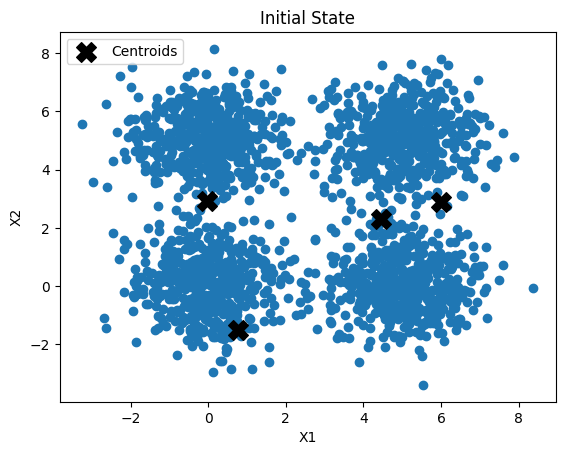

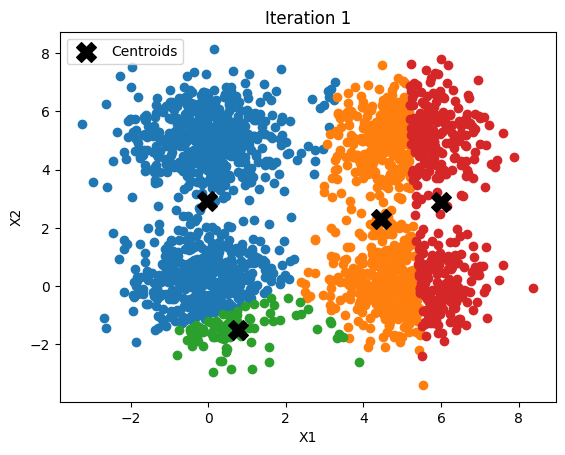

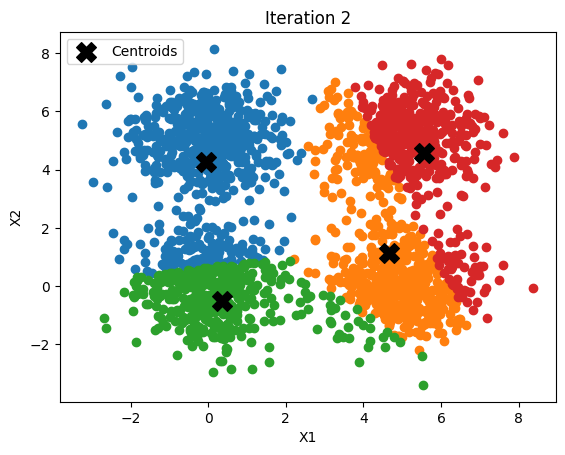

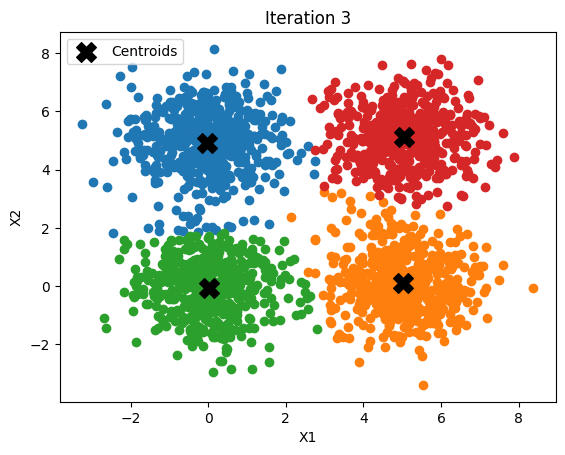

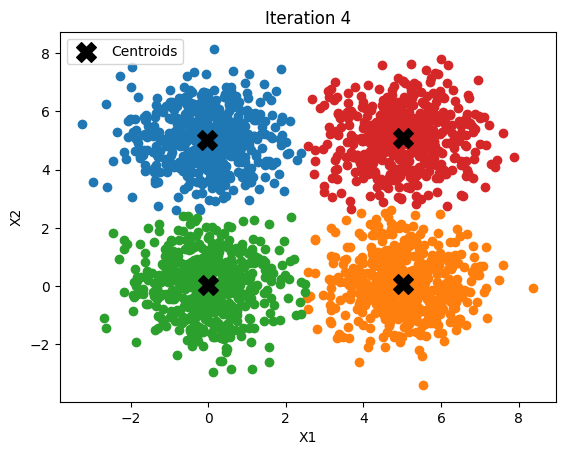

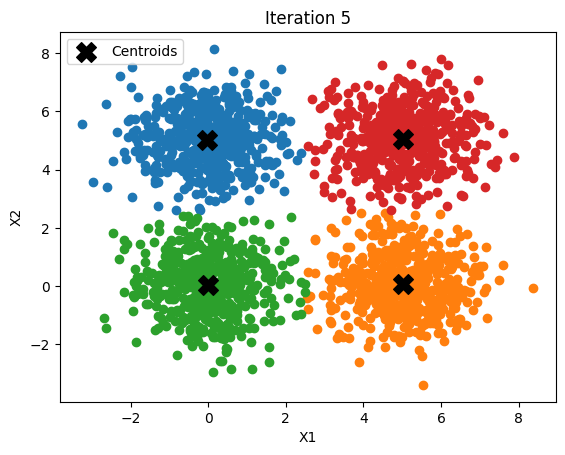

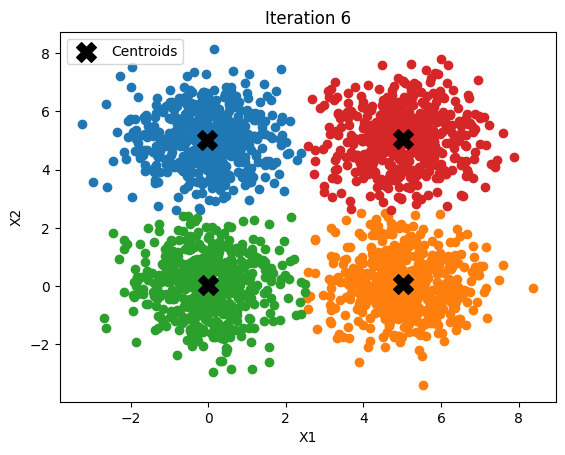

In [563]:
def run_and_plot_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300)
    kmeans.fit(X)

    plt.figure()
    initial_centroids = kmeans.centroids_history[0]
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
    plt.title('Initial State')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

    for i in range(len(kmeans.labels_history)):
        plt.figure()

        labels = kmeans.labels_history[i]
        centroids = kmeans.centroids_history[i]

        for j in range(n_clusters):
            cluster_points = X[labels == j]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1])

        plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

        plt.title(f'Iteration {i + 1}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.show()

n_clusters = 4
run_and_plot_kmeans(X, n_clusters)

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [564]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [565]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [566]:
import numpy as np
class PCA:
    def __init__(self):
        self.V = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        covariance_matrix = np.cov(X_centered, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        sorted_index = np.argsort(eigenvalues)[::-1]
        sorted_eigenvectors = eigenvectors[:, sorted_index]

        self.V = sorted_eigenvectors

    def transform(self, X, n_dimensions):
        X_centered = X - self.mean

        eigenvector_subset = self.V[:, :n_dimensions]
        X_reduced = np.dot(X_centered, eigenvector_subset)

        return X_reduced

    def reconstruct(self, X, n_dimensions):
        eigenvector_subset = self.V[:, :n_dimensions]
        X_reduced = np.dot(X - self.mean, eigenvector_subset)
        X_reconstructed = np.dot(X_reduced, eigenvector_subset.T) + self.mean
        return X_reconstructed

Run the algorithm on MNIST dataset.

In [567]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

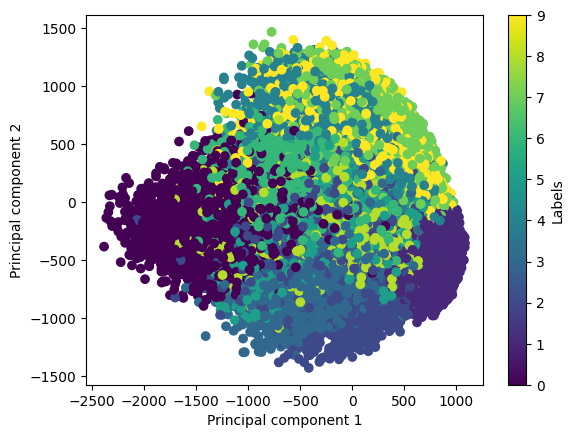

In [568]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

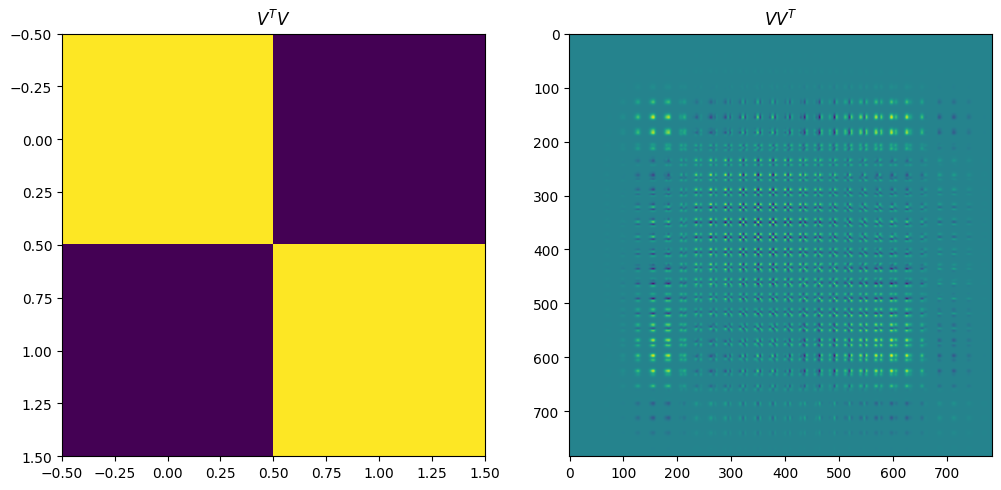

In [569]:
V = pca.V[:, :2]
V_T_V = np.dot(V.T, V)
V_V_T = np.dot(V, V.T)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(V_T_V, cmap='viridis')
ax[0].set_title(r'$V^T V$')

ax[1].imshow(V_V_T, cmap='viridis')
ax[1].set_title(r'$V V^T$')

plt.show()


Your Explanation:

-  $V^T V$: This matrix should be close to the identity matrix, indicating that the principal components are orthogonal.
-  $V V^T$: This is a projection matrix that helps reconstruct the original data from the reduced dimensions.


Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [570]:
def pca_reconstruction(X, n_dimensions):
    eigenvector_subset = pca.V[:, :n_dimensions]
    X_reduced = np.dot(X - pca.mean, eigenvector_subset)
    X_reconstructed = np.dot(X_reduced, eigenvector_subset.T) + pca.mean
    return X_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
No, the reconstructed image is not the original image because some information is lost during dimensionality reduction.

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


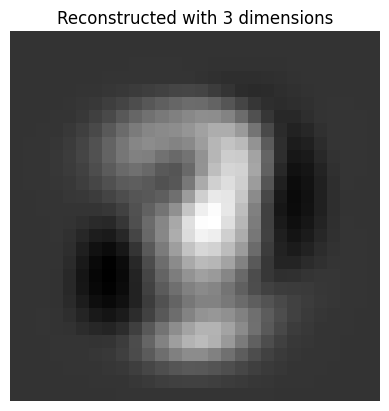

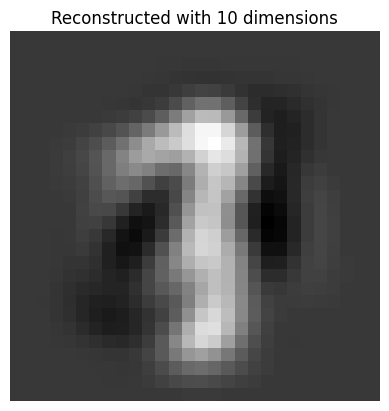

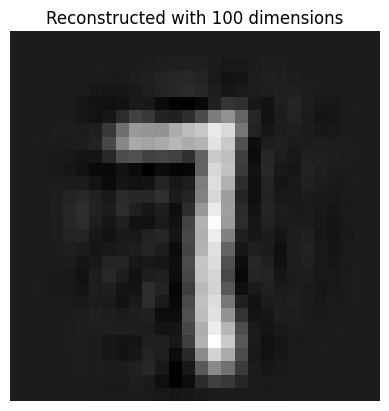

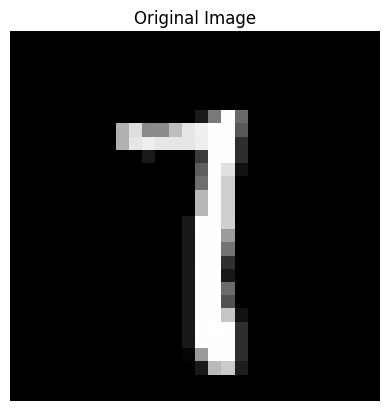

In [571]:
import random


def plot_image(image, title=""):
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


random_index = random.randint(0, X.shape[0] - 1)
original_image = X[random_index]

for dims in [3, 10, 100]:
    reconstructed_image = pca_reconstruction(np.array([original_image]), dims)
    plot_image(reconstructed_image[0], title=f"Reconstructed with {dims} dimensions")

plot_image(original_image, title="Original Image")